In [14]:
import updated_model
import numpy as np
from tqdm import tqdm

In [75]:
ACCURACY = updated_model.ACCURACY; ACCURACY

{'pss': 0.95,
 'pssn': 0.025,
 'pdd': 0.45,
 'pds': 0.27,
 'pddn': 0,
 'pdsn': 0,
 'pdm': 0.28,
 'ptt': 0.45,
 'pts': 0.55,
 'pttn': 0,
 'ptsn': 0,
 'pbb': 0.35,
 'pbob': 0.45,
 'pbs': 0.01,
 'pobb': 0.34,
 'pobob': 0.46,
 'pobs': 0.01}

In [16]:
OUTCOME_MAP = updated_model.OUTCOME_MAP



In [17]:
updated_model.get_neighbours(20)

{'target': 20, 'lower': 5, 'upper': 1, 'constant': 1}

In [63]:
def sim_strat(score,throw,strategies,accuracy,debug=False):
    count = 0
    ongoing_flag = True
    while ongoing_flag:
        if throw == 3:
            throw = 0
            count += 1
        
        strategy = strategies[throw][score]
        targets = updated_model.get_neighbours(strategy[1])
        outcomes = updated_model.OUTCOME_MAP[strategy[0]]
        probs = [accuracy[outcome[0]] for outcome in outcomes]
        outcome = outcomes[np.random.choice(range(len(outcomes)),p=probs)]
        if debug:
            print('s: {}'.format(strategy))
            print('o: {}'.format(outcome))
            print('throw {} {}'.format(count,throw))
        throw += 1

        
        payoff = outcome[1] * targets[outcome[2]]
        if score - payoff == 0 and outcome[1] == 2:
            break
        
        if score == 50 and outcome == 50:
            break

        if ongoing_flag and score - payoff <= 1:
            count += 1
            throw -= 1
        else:
            score = int(score - payoff)

    return count
        
        

In [64]:
def sim_expectations(score,throw,strategies,accuracy,num_sims):
    sims = [sim_strat(score,throw,strategies,accuracy) for x in range(num_sims)]
    return sum(sims)/num_sims



In [65]:
max_val = 60
optimal_strategies, optimal_strategy_values = updated_model.gen_optimal_strategies(updated_model.ACCURACY,max_val)

100%|██████████| 58/58 [00:00<00:00, 920.30it/s]


In [66]:
#baseline_strategies, baseline_strategy_values = updated_model.gen_baseline_strategies(updated_model.ACCURACY,180)

In [67]:
score = 30
throw = 0
strategies = optimal_strategies
accuracy = updated_model.ACCURACY
sim_strat(score,throw,strategies,accuracy)
sim_expectations(score,throw,strategies,accuracy,1000)


0.354

In [68]:
def sim_all_strategies(max_score,strategies,accuracy,num_sims):

    sim_strategy_values = np.empty((3,max_score))
    for score in range(2,max_score):
        for throw in range(3):
            sim_strategy_values[throw][score] = sim_expectations(score,throw,optimal_strategies,ACCURACY,num_sims)
    return sim_strategy_values

sim_strategies = sim_all_strategies(30,optimal_strategies,ACCURACY,5000)

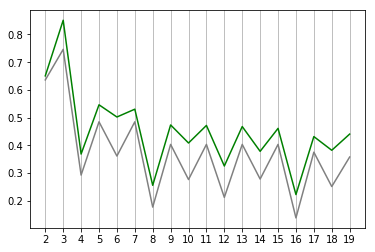

In [69]:
import matplotlib.pyplot as plt
import seaborn

def plot(sim,opt,start,stop):
    plt.plot(range(start,stop),sim[start:stop],'green')
    plt.plot(range(start,stop),opt[start:stop],'grey')
    plt.xticks(range(start,stop))
    plt.grid(axis='x')
    plt.show()

start = 2
stop = 20
plot(sim_strategies[0],optimal_strategy_values[0],start,stop)


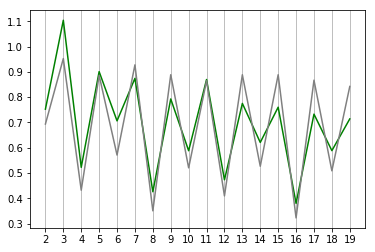

In [70]:
plot(sim_strategies[1],optimal_strategy_values[1],start,stop)

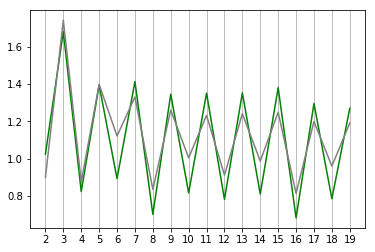

In [71]:
plot(sim_strategies[2],optimal_strategy_values[2],start,stop)

In [111]:
sim_strategies[0][2]
optimal_strategy_values[0][2]

0.635911529904463

In [47]:
optimal_strategy_values[1][2]

0.6936264886794924

In [48]:
optimal_strategy_values[0][3]

0.7462580676268609

In [50]:
sim_strategies[0][3]

0.8502

In [76]:
for i in range(20):
    ans = sim_strat(3,0,optimal_strategies,ACCURACY,debug=True)
    print('ans {}'.format(ans))

s: [1. 1.]
o: ['pss', 1, 'target']
throw 0 0
s: [2. 1.]
o: ['pdm', 0, 'constant']
throw 0 1
s: [2. 1.]
o: ['pds', 1, 'target']
throw 0 2
s: [2. 1.]
o: ['pdd', 2, 'target']
throw 1 2
ans 1
s: [1. 1.]
o: ['pss', 1, 'target']
throw 0 0
s: [2. 1.]
o: ['pdd', 2, 'target']
throw 0 1
ans 0
s: [1. 1.]
o: ['pss', 1, 'target']
throw 0 0
s: [2. 1.]
o: ['pdm', 0, 'constant']
throw 0 1
s: [2. 1.]
o: ['pdm', 0, 'constant']
throw 0 2
s: [2. 1.]
o: ['pds', 1, 'target']
throw 1 0
s: [2. 1.]
o: ['pdd', 2, 'target']
throw 2 0
ans 2
s: [1. 1.]
o: ['pss', 1, 'target']
throw 0 0
s: [2. 1.]
o: ['pdd', 2, 'target']
throw 0 1
ans 0
s: [1. 1.]
o: ['pss', 1, 'target']
throw 0 0
s: [2. 1.]
o: ['pds', 1, 'target']
throw 0 1
s: [2. 1.]
o: ['pdm', 0, 'constant']
throw 1 1
s: [2. 1.]
o: ['pdd', 2, 'target']
throw 1 2
ans 1
s: [1. 1.]
o: ['pssn', 1, 'upper']
throw 0 0
s: [1. 1.]
o: ['pss', 1, 'target']
throw 1 0
s: [2. 1.]
o: ['pdm', 0, 'constant']
throw 1 1
s: [2. 1.]
o: ['pds', 1, 'target']
throw 1 2
s: [2. 1.]
o: [